<a href="https://colab.research.google.com/github/smurillo1/saversmatch/blob/main/DesafioSAVERS_MATCH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise do impacto de uma nova legislação na simulação de preparo das pessoas para a aposentadoria nos EUA.

### By: Sávio Murillo Dias Bastos



## Entendendo a problemática


A Lei SECURE 2.0 foi recentemente assinada pelo Presidente Biden. Surgindo apenas alguns anos após a primeira Lei SECURE, essa legislação traz uma série de mudanças projetadas para facilitar aos americanos a economia para a aposentadoria, incluindo a criação da inscrição obrigatória em planos de contribuição definida, permitindo contribuições adicionais para compensar atrasos e aumentando a idade para distribuições mínimas exigidas até os 75 anos.

Uma mudança que afetará especialmente os americanos de baixa e média renda é o cancelamento do "Savers_Credit" em um novo programa chamado "Savers Match".

Este case tem como objetivo avaliar o quanto os grupos populacionais estão preparados para a mudança.

In [321]:
pip install pandas-profiling

In [322]:
pip install ProfileReport

ERROR: Could not find a version that satisfies the requirement ProfileReport (from versions: none)
ERROR: No matching distribution found for ProfileReport


In [323]:
#tratamento e manipulação
import pandas as pd
import pandas_profiling
import numpy as np
#visualização
import matplotlib.pyplot as plt
import seaborn as sns



In [324]:
df = pd.read_csv('/content/data.csv')

In [325]:
# Removendo a coluna "Unnamed: 0"
df = df.drop(columns=['Unnamed: 0'])

## Entedimento inicial dos dados:

- initial_age: idade inicial na simulação;
- weight: peso de influência do grupo na população;
- income: Renda bruta anual do indivíduo;
- family_kind: Classificação do chefe da família;
- race: raça;
- marital_status: estado civil;
- annual_contribution: % de contribuição dos indivíduos em relação à renda;
- accumulated_capital: (pós falecimento) saldo resultante considerando todas as receitas e despesas, maior ou igual a zero significa que a aposentadoria foi paga, menor que zero, significa que a aposentadoria não foi quitada.

In [326]:
df.head(3)

,initial_age,weight,family_kind,race,marital_status,accumulated_capital,annual_contribution,income
0,57,616,2,1,3,-153263.200759,0.23,42658.02
1,45,591,1,1,1,161474.307306,0.24,248327.61
2,59,613,1,1,1,14209.331170,0.09,24371.94


### Pré-diagnóstico

Utilizando um Profile Report para observar de maneira geral a estrutura do dataset e conseguir identificar com mais eficiência os pontos mais deficientes.

In [327]:
profile = df.profile_report(title='Profile Report')

#Criando Relatório
profile.to_file(output_file='profile_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Incialmente, o relatório realizado com pandas profiling, identificou três pontos que podem ajudar no tratamento e entendimento dos dados. Sendo eles:

- Presença de '0' na coluna 'annual_contribution'.
- Alta correlação entre duas colunas ('family_kind' e 'marital_status').

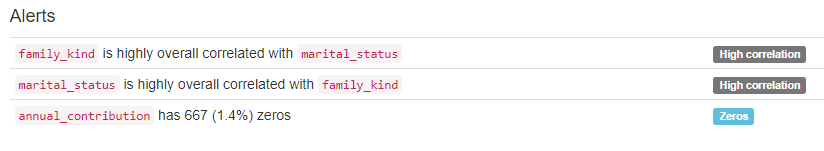

In [328]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47626 entries, 0 to 47625
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   initial_age          47626 non-null  int64  
 1   weight               47626 non-null  int64  
 2   family_kind          47626 non-null  int64  
 3   race                 47626 non-null  int64  
 4   marital_status       47626 non-null  int64  
 5   accumulated_capital  47626 non-null  float64
 6   annual_contribution  47626 non-null  float64
 7   income               47626 non-null  float64
dtypes: float64(3), int64(5)
memory usage: 2.9 MB


In [329]:
df.isnull().sum()

initial_age            0
weight                 0
family_kind            0
race                   0
marital_status         0
accumulated_capital    0
annual_contribution    0
income                 0
dtype: int64

Observando as informações gerais, pode-se observar que os 'zeros' informados no relatório prévio, não se tratam de valores nulos. Mas sim, significa
que não houve contribuição naquele ano por parte da família, como podemos ver abaixo:


In [330]:
df.loc[df['annual_contribution'] == 0]

,initial_age,weight,family_kind,race,marital_status,accumulated_capital,annual_contribution,income
131,43,286,1,1,1,-125129.871240,0.0,51966.20
252,40,617,2,1,5,-434750.340237,0.0,83830.82
261,39,315,3,1,3,97732.986246,0.0,8555.79
316,51,591,1,1,1,-247708.599717,0.0,13491.09
317,44,566,2,1,5,596927.862382,0.0,30332.45
...,...,...,...,...,...,...,...,...
47232,36,530,1,4,1,121887.510644,0.0,144452.52
47387,39,342,1,4,1,81806.290309,0.0,88150.94
47411,51,367,1,4,1,1323.683680,0.0,55800.30
47471,56,358,1,4,1,-62839.574051,0.0,117273.49


In [331]:
#Conferindo a existência de duplicados
df.duplicated().sum()

0

In [332]:
df.describe()

,initial_age,weight,family_kind,race,marital_status,accumulated_capital,annual_contribution,income
count,47626.000000,47626.000000,47626.000000,47626.000000,47626.000000,4.762600e+04,47626.000000,47626.000000
mean,48.379793,1551.159535,1.730756,1.693634,2.245454,2.483036e+04,0.175277,70240.892997
std,8.064861,942.788098,0.852361,1.014817,1.554839,1.705045e+05,0.101389,49720.565014
min,35.000000,98.000000,1.000000,1.000000,1.000000,-5.119091e+05,0.000000,250.650000
25%,42.000000,811.250000,1.000000,1.000000,1.000000,-8.116163e+04,0.090000,33878.760000
50%,48.000000,1500.000000,1.000000,1.000000,1.000000,2.280218e+04,0.180000,59084.150000
75%,55.000000,1971.000000,3.000000,2.000000,3.000000,1.016781e+05,0.260000,94320.602500
max,63.000000,9349.000000,3.000000,4.000000,5.000000,1.111905e+06,0.350000,473601.750000


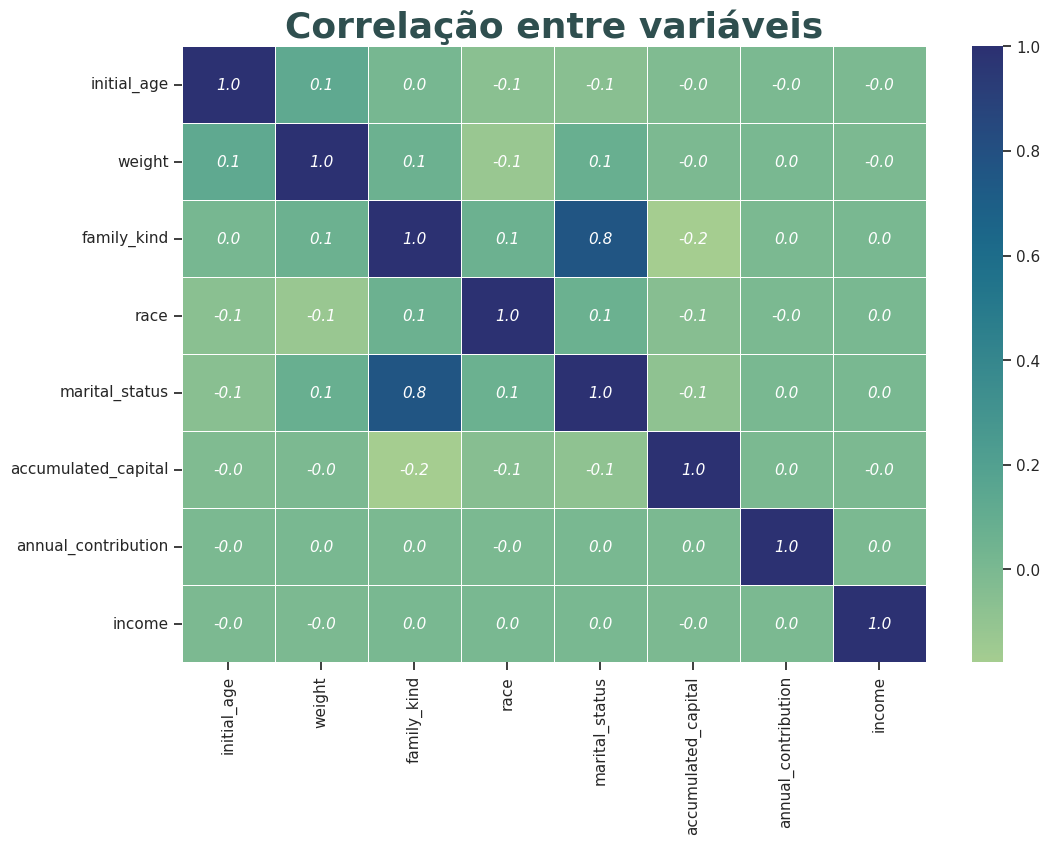

In [333]:
#Estabelecendo correlação entre variáveis contínuas
annot_kws={'fontsize':11,
           'fontstyle':'italic',
           'color':"w",
           'alpha':1,
           'horizontalalignment':'center'}

sns.set(rc={'figure.figsize':(12,8), 'figure.facecolor':'white'})
sns.set_style("ticks")
plt.title('Correlação entre variáveis', fontsize=26, fontweight='bold',color='#2F4F4F');

#utlizando variaveis contínuas para realizar a correlação de Pearson (r)
sns.heatmap(df.corr(),annot=True, annot_kws = annot_kws, fmt='.1f', linewidth=.5, cmap='crest');

Há uma forte correlação entre as colunas 'marital_status' e 'family_kind', vamos explorar esta informação e tentar entender no que impacta a mudança instaurada pela Lei.


## Tratamento dos dados

Alteração de tipos de variáveis e tratamento de Outliers.

In [334]:
#alterando formato de dados categoricos
data_types_dict = {'family_kind':'category','race':'category','marital_status':'category'}
#salvando alterações
df = df.astype(data_types_dict)

In [335]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47626 entries, 0 to 47625
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   initial_age          47626 non-null  int64   
 1   weight               47626 non-null  int64   
 2   family_kind          47626 non-null  category
 3   race                 47626 non-null  category
 4   marital_status       47626 non-null  category
 5   accumulated_capital  47626 non-null  float64 
 6   annual_contribution  47626 non-null  float64 
 7   income               47626 non-null  float64 
dtypes: category(3), float64(3), int64(2)
memory usage: 2.0 MB


In [336]:
df.describe()

,initial_age,weight,accumulated_capital,annual_contribution,income
count,47626.000000,47626.000000,4.762600e+04,47626.000000,47626.000000
mean,48.379793,1551.159535,2.483036e+04,0.175277,70240.892997
std,8.064861,942.788098,1.705045e+05,0.101389,49720.565014
min,35.000000,98.000000,-5.119091e+05,0.000000,250.650000
25%,42.000000,811.250000,-8.116163e+04,0.090000,33878.760000
50%,48.000000,1500.000000,2.280218e+04,0.180000,59084.150000
75%,55.000000,1971.000000,1.016781e+05,0.260000,94320.602500
max,63.000000,9349.000000,1.111905e+06,0.350000,473601.750000


Feito isso, vamos analisar a existência de outliers em nosso dataset


Text(0.5, 1.0, 'Boxplot')

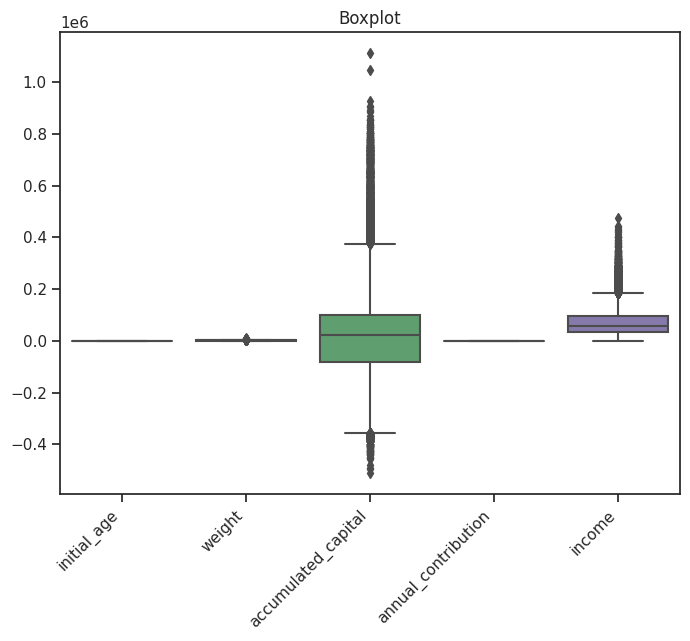

In [337]:
plt.figure(figsize=(8,6))
sns.boxplot(df)

# Girar a legenda no eixo x
plt.xticks(rotation=45, ha='right')

# Definir o título do gráfico
plt.title('Boxplot')

Conseguimos observar que 'weight', 'accumulated_capital' e 'income' possuem um quantitativo considerável de outliers. Vamos tratá-los.

In [338]:
# Lista das colunas para remover os outliers
colunas = ['accumulated_capital', 'income', 'weight']

# Iterar sobre as colunas e remover os outliers
for coluna in colunas:
    # Calcular Q1, Q3 e IQR para a coluna atual
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1

    # Definir os limites superior e inferior para a coluna atual
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Remover os outliers da coluna atual
    df = df[(df[coluna] >= limite_inferior) & (df[coluna] <= limite_superior)]

Text(0.5, 1.0, 'Boxplot')

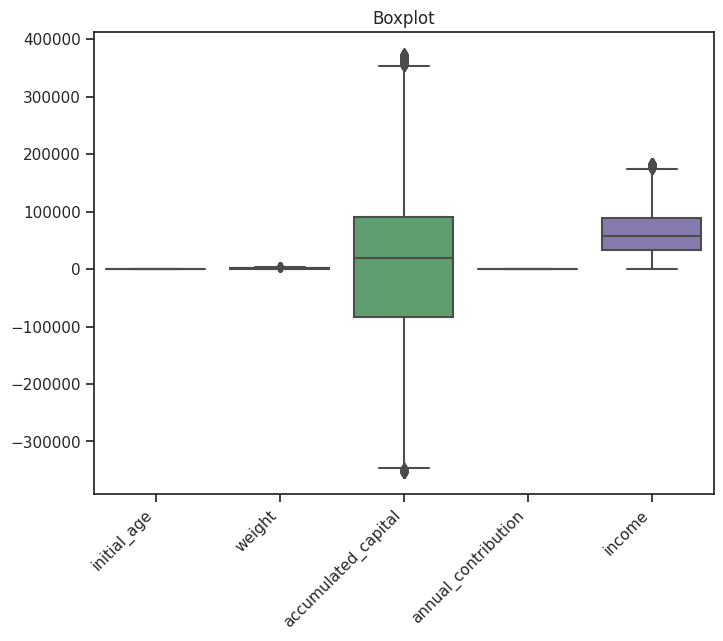

In [339]:
plt.figure(figsize=(8,6))
sns.boxplot(df)

# Girar a legenda no eixo x
plt.xticks(rotation=45, ha='right')

# Definir o título do gráfico
plt.title('Boxplot')

In [340]:
df.describe()

,initial_age,weight,accumulated_capital,annual_contribution,income
count,43540.000000,43540.000000,43540.000000,43540.000000,43540.000000
mean,48.322669,1516.121130,6620.668489,0.175082,65061.746304
std,8.067032,895.959133,135987.884604,0.101368,40700.409848
min,35.000000,98.000000,-355417.664253,0.000000,250.650000
25%,41.000000,798.000000,-84126.499680,0.090000,33186.900000
50%,48.000000,1490.000000,18759.514828,0.180000,57355.110000
75%,55.000000,1943.000000,90791.087940,0.260000,89838.517500
max,63.000000,3710.000000,375822.672311,0.350000,185052.200000


In [341]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43540 entries, 0 to 47625
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   initial_age          43540 non-null  int64   
 1   weight               43540 non-null  int64   
 2   family_kind          43540 non-null  category
 3   race                 43540 non-null  category
 4   marital_status       43540 non-null  category
 5   accumulated_capital  43540 non-null  float64 
 6   annual_contribution  43540 non-null  float64 
 7   income               43540 non-null  float64 
dtypes: category(3), float64(3), int64(2)
memory usage: 2.1 MB


## Análise

Deliverables
- Entrega do arquivo "new_scenario.csv" com a adição da coluna "new_accumulated_capital"
- Gerar 2 gráficos:
  - Déficit médio ponderado de poupança para aposentadoria por raça e intervalos de idade  [35,39), [40,44),
45,49), [50,54), [55,59),[60,64)
  - Impacto percentual do novo cenário  na classificação de prontidão para a aposentadoria por corte de idade.]
  - Disponibilizar código utilizado.

Intervalos de eliminação do 'Savers Match':

- Se a renda bruta anual estiver abaixo do determinado, o indivíduo estará elegível.

    Renda bruta anual abaixo de e com limite de:

    - Solteiros: USD 20.500 E USD 35.000
    - Casais: USD 41.000 E USD 71.000
    - Chefes de família: USD 30.750 E USD 53.000

Demais observações

- Aposentadoria: 65 anos
- Inflação: 4,4% ao ano
- Ano inicial da simulação: 2020
- Ajuste de renda pela inflação todos os anos
- Classificação de prontidão (Readiness Rating): numero de pessoas que pagaram a aposentadoria / total de pessoas
- Déficit = Soma de todos que tiveram déficits / total de pessoas




In [342]:
df.head()

,initial_age,weight,family_kind,race,marital_status,accumulated_capital,annual_contribution,income
0,57,616,2,1,3,-153263.200759,0.23,42658.02
2,59,613,1,1,1,14209.331170,0.09,24371.94
3,62,656,1,1,1,-77270.897162,0.17,48788.04
4,45,567,2,1,5,282353.182490,0.22,47808.66
5,40,300,1,1,1,186133.535897,0.12,31875.40


In [343]:
#criando coluna com valor da contribuição anual
df['contribution'] = df['annual_contribution'] * df['income']

In [344]:
#valor máximo de crédito oferecido pelo savers_match (em cima do valor adotado no problema = 10000)
df['value_max'] = 5000

In [345]:
#50% do valor depositado
df['corresp_contribution'] = df['contribution'] * 0.5

In [346]:
#valor creditado de acordo com teto de crédito (50% de 10000)
df['savers_match'] = df[['value_max', 'corresp_contribution']].apply(min, axis=1)

## Assumptions

Foi necessário realizar algumas definições para que seja possível concluir a análise:

- Primeiro, entende-se que os valores de crédito (50% de 10000) variam em alguns intervalos de acordo com o 'marital_status'. Sendo assim, a variação entre essa distribuição foi determina por mim através das listas 'tabela' e 'corresp'. Sendo assim, a função identificará a contribuição do indivíduo e atribuirá o valor correspondente no crédito de poupança.

- Segundo, a forma em que a inflação vai impactar no df. Vamos determinar que a elegibilidade do indivíduo será resultado da relação entre 'income', inflação e periodo até a aposentadoria, sendo isso comparado ao 'new_accumulated_capital'. Caso os valores estejam dentro dos limites corrigidos pela inflação, o individuo estará elegível, caso contrário, não elegivel.


## Separação de df's

Sabendo que há uma forte correlação entre 'family_kind' e 'marital_status', iremos separar o df em três, para conseguir analisar como o credito será gerado dentro de cada grupo. Após isso, os df's serao unificados para retomarmos a análise.

In [347]:
df['retirement'] = 65

In [348]:
df['contribution_years'] = df['retirement'] - df['initial_age']

### Solteiros

Considerando, dentro do grupo de 'marital_status', duas classificações para solteiros. sendo:

 - 4: pessoas separadas (não possuiram vinculo matrimonial);
 - 5: nunca casaram.


In [349]:
df_solteiro = df[df['marital_status'].isin([4, 5])]

In [350]:
#estabelecendo um intervalo uma condição
#para cada valor na tabela há um indice correspondido

corresp = [1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.05, 0.0]
tabela = [20500, 22000, 23500, 25000, 26500, 28000, 29500, 31000, 32500, 34000, 35000]

def busca(tabela, valor):
  l = 0
  r = len(tabela) - 1
  res = -1
  while l <= r:
    m = (l + r) // 2
    if tabela[m] >= valor:
      res = m
      r = m - 1
    else:
      l = m + 1
  return res

df_solteiro['credit'] = [corresp[busca(tabela, i)] * 5000 for i in df_solteiro['income']]

<ipython-input-350-37c3bf235141>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_solteiro['credit'] = [corresp[busca(tabela, i)] * 5000 for i in df_solteiro['income']]


In [351]:
df_solteiro.head()

,initial_age,weight,family_kind,race,marital_status,accumulated_capital,annual_contribution,income,contribution,value_max,corresp_contribution,savers_match,retirement,contribution_years,credit
4,45,567,2,1,5,282353.182490,0.22,47808.66,10517.9052,5000,5258.95260,5000.0000,65,20,0.0
9,54,538,2,1,5,-100385.681581,0.23,30736.38,7069.3674,5000,3534.68370,3534.6837,65,11,1500.0
14,40,644,3,1,5,16123.378077,0.25,45892.81,11473.2025,5000,5736.60125,5000.0000,65,25,0.0
15,45,644,2,1,5,144259.266170,0.18,29561.58,5321.0844,5000,2660.54220,2660.5422,65,20,1500.0
48,43,343,2,1,4,-74450.234926,0.26,39049.45,10152.8570,5000,5076.42850,5000.0000,65,22,0.0


In [352]:
#calculando novos valores a partir da inflação
taxa_inflacao_anual = 0.044
df_solteiro['credit'] = df_solteiro.apply(lambda row: row['credit'] * (1 + taxa_inflacao_anual) ** row['contribution_years'], axis=1)

<ipython-input-352-41fda1f8b65a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_solteiro['credit'] = df_solteiro.apply(lambda row: row['credit'] * (1 + taxa_inflacao_anual) ** row['contribution_years'], axis=1)


In [353]:
df_solteiro.head()

,initial_age,weight,family_kind,race,marital_status,accumulated_capital,annual_contribution,income,contribution,value_max,corresp_contribution,savers_match,retirement,contribution_years,credit
4,45,567,2,1,5,282353.182490,0.22,47808.66,10517.9052,5000,5258.95260,5000.0000,65,20,0.000000
9,54,538,2,1,5,-100385.681581,0.23,30736.38,7069.3674,5000,3534.68370,3534.6837,65,11,2408.777825
14,40,644,3,1,5,16123.378077,0.25,45892.81,11473.2025,5000,5736.60125,5000.0000,65,25,0.000000
15,45,644,2,1,5,144259.266170,0.18,29561.58,5321.0844,5000,2660.54220,2660.5422,65,20,3548.961045
48,43,343,2,1,4,-74450.234926,0.26,39049.45,10152.8570,5000,5076.42850,5000.0000,65,22,0.000000


### Casais que declararam juntos

Para essa classificação, vamos levar em conta:
- 1: Casados.

In [354]:
df_casais = df[df['marital_status'].isin([1])]

In [355]:
#estabelecendo um intervalo uma condição
#para cada valor na tabela há um indice correspondido
corresp = [1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.05, 0.0]
tabela = [41000, 44000, 47000, 50000, 53000, 56000, 59000, 62000, 65000, 68000, 71000]

def busca(tabela, valor):
  l = 0
  r = len(tabela) - 1
  res = -1
  while l <= r:
    m = (l + r) // 2
    if tabela[m] >= valor:
      res = m
      r = m - 1
    else:
      l = m + 1
  return res

df_casais['credit'] = [corresp[busca(tabela, i)] * 5000 for i in df_casais['income']]
df.head()

<ipython-input-355-fd6c02d3a615>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_casais['credit'] = [corresp[busca(tabela, i)] * 5000 for i in df_casais['income']]


,initial_age,weight,family_kind,race,marital_status,accumulated_capital,annual_contribution,income,contribution,value_max,corresp_contribution,savers_match,retirement,contribution_years
0,57,616,2,1,3,-153263.200759,0.23,42658.02,9811.3446,5000,4905.6723,4905.6723,65,8
2,59,613,1,1,1,14209.331170,0.09,24371.94,2193.4746,5000,1096.7373,1096.7373,65,6
3,62,656,1,1,1,-77270.897162,0.17,48788.04,8293.9668,5000,4146.9834,4146.9834,65,3
4,45,567,2,1,5,282353.182490,0.22,47808.66,10517.9052,5000,5258.9526,5000.0000,65,20
5,40,300,1,1,1,186133.535897,0.12,31875.40,3825.0480,5000,1912.5240,1912.5240,65,25


In [356]:
#calculando novos valores a partir da inflação
df_casais['credit'] = df_casais.apply(lambda row: row['credit'] * (1 + taxa_inflacao_anual) ** row['contribution_years'], axis=1)

<ipython-input-356-307b086a4ebe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_casais['credit'] = df_casais.apply(lambda row: row['credit'] * (1 + taxa_inflacao_anual) ** row['contribution_years'], axis=1)


In [357]:
df_casais.head()

,initial_age,weight,family_kind,race,marital_status,accumulated_capital,annual_contribution,income,contribution,value_max,corresp_contribution,savers_match,retirement,contribution_years,credit
2,59,613,1,1,1,14209.331170,0.09,24371.94,2193.4746,5000,1096.73730,1096.73730,65,6,6474.004491
3,62,656,1,1,1,-77270.897162,0.17,48788.04,8293.9668,5000,4146.98340,4146.98340,65,3,3982.626144
5,40,300,1,1,1,186133.535897,0.12,31875.40,3825.0480,5000,1912.52400,1912.52400,65,25,14671.768675
6,35,318,1,1,1,101335.187150,0.03,31627.77,948.8331,5000,474.41655,474.41655,65,30,18196.378600
7,57,545,1,1,1,-129635.976513,0.08,90134.48,7210.7584,5000,3605.37920,3605.37920,65,8,0.000000


### Chefes de família

- 2: Viúvo;
- 3: Divorciado.

In [358]:
df_chefes = df[df['marital_status'].isin([2,3])]

In [359]:
#estabelecendo um intervalo uma condição
#para cada valor na tabela há um indice correspondido
corresp = [1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.05, 0.0]
tabela = [30750,33000,35250,37500,39750,42000,44250,46500,48750,51000,53250]

def busca(tabela, valor):
  l = 0
  r = len(tabela) - 1
  res = -1
  while l <= r:
    m = (l + r) // 2
    if tabela[m] >= valor:
      res = m
      r = m - 1
    else:
      l = m + 1
  return res

df_chefes['credit'] = [corresp[busca(tabela, i)] * 5000 for i in df_chefes['income']]

<ipython-input-359-307828849231>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chefes['credit'] = [corresp[busca(tabela, i)] * 5000 for i in df_chefes['income']]


In [360]:
df_chefes.head()

,initial_age,weight,family_kind,race,marital_status,accumulated_capital,annual_contribution,income,contribution,value_max,corresp_contribution,savers_match,retirement,contribution_years,credit
0,57,616,2,1,3,-153263.200759,0.23,42658.02,9811.3446,5000,4905.67230,4905.6723,65,8,2000.0
11,61,621,2,1,3,16199.820563,0.25,125928.79,31482.1975,5000,15741.09875,5000.0000,65,4,0.0
23,42,617,2,1,3,273340.955366,0.24,20743.65,4978.4760,5000,2489.23800,2489.2380,65,23,5000.0
36,46,660,3,1,3,228424.974146,0.02,34971.71,699.4342,5000,349.71710,349.7171,65,19,4000.0
42,61,572,2,1,3,312897.413284,0.15,133564.14,20034.6210,5000,10017.31050,5000.0000,65,4,0.0


In [361]:
#calculando novos valores a partir da inflação
df_chefes['credit'] = df_chefes.apply(lambda row: row['credit'] * (1 + taxa_inflacao_anual) ** row['contribution_years'], axis=1)

<ipython-input-361-3bf9239c85aa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chefes['credit'] = df_chefes.apply(lambda row: row['credit'] * (1 + taxa_inflacao_anual) ** row['contribution_years'], axis=1)


##  Juntando df's de 'marital_status'

In [362]:
#Juntando df's de marital_status para continuar a analise
df = pd.concat([df_solteiro, df_casais, df_chefes], axis=0)
df.head()

,initial_age,weight,family_kind,race,marital_status,accumulated_capital,annual_contribution,income,contribution,value_max,corresp_contribution,savers_match,retirement,contribution_years,credit
4,45,567,2,1,5,282353.182490,0.22,47808.66,10517.9052,5000,5258.95260,5000.0000,65,20,0.000000
9,54,538,2,1,5,-100385.681581,0.23,30736.38,7069.3674,5000,3534.68370,3534.6837,65,11,2408.777825
14,40,644,3,1,5,16123.378077,0.25,45892.81,11473.2025,5000,5736.60125,5000.0000,65,25,0.000000
15,45,644,2,1,5,144259.266170,0.18,29561.58,5321.0844,5000,2660.54220,2660.5422,65,20,3548.961045
48,43,343,2,1,4,-74450.234926,0.26,39049.45,10152.8570,5000,5076.42850,5000.0000,65,22,0.000000


In [363]:
#criando a coluna de new_accumulated_capital
df['new_accumulated_capital'] = df['accumulated_capital'] + df['credit']

In [364]:
df.head()

,initial_age,weight,family_kind,race,marital_status,accumulated_capital,annual_contribution,income,contribution,value_max,corresp_contribution,savers_match,retirement,contribution_years,credit,new_accumulated_capital
4,45,567,2,1,5,282353.182490,0.22,47808.66,10517.9052,5000,5258.95260,5000.0000,65,20,0.000000,282353.182490
9,54,538,2,1,5,-100385.681581,0.23,30736.38,7069.3674,5000,3534.68370,3534.6837,65,11,2408.777825,-97976.903756
14,40,644,3,1,5,16123.378077,0.25,45892.81,11473.2025,5000,5736.60125,5000.0000,65,25,0.000000,16123.378077
15,45,644,2,1,5,144259.266170,0.18,29561.58,5321.0844,5000,2660.54220,2660.5422,65,20,3548.961045,147808.227215
48,43,343,2,1,4,-74450.234926,0.26,39049.45,10152.8570,5000,5076.42850,5000.0000,65,22,0.000000,-74450.234926


## Licensed x No Licensed

Neste ponto, classificamos quem está preparado para receber o benefício ('licensed') de quem não está ('no licensed').

In [365]:
#Criando a coluna que classifica quem está habilitado ou não para receber o benefício
df['licensed'] = np.where(df['credit'] == 0, 'no licensed', 'licensed')

In [366]:
df.head()

,initial_age,weight,family_kind,race,marital_status,accumulated_capital,annual_contribution,income,contribution,value_max,corresp_contribution,savers_match,retirement,contribution_years,credit,new_accumulated_capital,licensed
4,45,567,2,1,5,282353.182490,0.22,47808.66,10517.9052,5000,5258.95260,5000.0000,65,20,0.000000,282353.182490,no licensed
9,54,538,2,1,5,-100385.681581,0.23,30736.38,7069.3674,5000,3534.68370,3534.6837,65,11,2408.777825,-97976.903756,licensed
14,40,644,3,1,5,16123.378077,0.25,45892.81,11473.2025,5000,5736.60125,5000.0000,65,25,0.000000,16123.378077,no licensed
15,45,644,2,1,5,144259.266170,0.18,29561.58,5321.0844,5000,2660.54220,2660.5422,65,20,3548.961045,147808.227215,licensed
48,43,343,2,1,4,-74450.234926,0.26,39049.45,10152.8570,5000,5076.42850,5000.0000,65,22,0.000000,-74450.234926,no licensed


##Inflação

In [367]:
#criação da coluna com idade de aposentadoria
df['retirement'] = 65

In [368]:
#Calculando anos de contribuição
df['contribution_years'] = df['retirement'] - df['initial_age']

In [369]:
#Calculando inflação para algumas colunas

taxa_inflacao_anual = 0.044  # Taxa de inflação de 4.4%
df['income'] = df.apply(lambda row: row['income'] * (1 + taxa_inflacao_anual) ** row['contribution_years'], axis=1)
df['savers_match'] = df.apply(lambda row: row['savers_match'] * (1 + taxa_inflacao_anual) ** row['contribution_years'], axis=1)
df['credit'] = df.apply(lambda row: row['credit'] * (1 + taxa_inflacao_anual) ** row['contribution_years'], axis=1)

In [370]:
#Definindo new_accumulated_capital
df['new_accumulated_capital'] = df['accumulated_capital'] + df['credit']

In [371]:
#Excluindo colunas inuteis
df = df.drop(['contribution', 'value_max', 'corresp_contribution','savers_match','retirement'], axis=1)

In [372]:
df.head()

,initial_age,weight,family_kind,race,marital_status,accumulated_capital,annual_contribution,income,contribution_years,credit,new_accumulated_capital,licensed
4,45,567,2,1,5,282353.182490,0.22,113114.047974,20,0.000000,282353.182490,no licensed
9,54,538,2,1,5,-100385.681581,0.23,49358.073703,11,3868.140406,-96517.541175,licensed
14,40,644,3,1,5,16123.378077,0.25,134665.738431,25,0.000000,16123.378077,no licensed
15,45,644,2,1,5,144259.266170,0.18,69941.930569,20,8396.749667,152656.015836,licensed
48,43,343,2,1,4,-74450.234926,0.26,100699.170244,22,0.000000,-74450.234926,no licensed


Levando em conta que os intervalos de eliminação será atualizado no final de cada ano e que a taxa fixa proposta no case foi de 4,4%. Iremos calcular o impacto da inflação até a aposentadoria de cada indivíduo.

# Faixas etárias

In [373]:
# Criar um DataFrame de exemplo
df['initial_age']

# Definir os limites dos intervalos
intervals = [35, 40, 45, 50, 55, 60, 65]

# Definir os rótulos dos intervalos
labels = ['[35,39)', '[40,44)', '[45,49)', '[50,54)', '[55,59)', '[60,64)']

# Criar a nova coluna com base nos intervalos
df['interval_age'] = pd.cut(df['initial_age'], bins=intervals, labels=labels, right=False)

# Exibir o DataFrame resultante
df.head()


,initial_age,weight,family_kind,race,marital_status,accumulated_capital,annual_contribution,income,contribution_years,credit,new_accumulated_capital,licensed,interval_age
4,45,567,2,1,5,282353.182490,0.22,113114.047974,20,0.000000,282353.182490,no licensed,"[45,49)"
9,54,538,2,1,5,-100385.681581,0.23,49358.073703,11,3868.140406,-96517.541175,licensed,"[50,54)"
14,40,644,3,1,5,16123.378077,0.25,134665.738431,25,0.000000,16123.378077,no licensed,"[40,44)"
15,45,644,2,1,5,144259.266170,0.18,69941.930569,20,8396.749667,152656.015836,licensed,"[45,49)"
48,43,343,2,1,4,-74450.234926,0.26,100699.170244,22,0.000000,-74450.234926,no licensed,"[40,44)"


## Criando df com Déficit

In [374]:
df_dfct = df[['initial_age','race','interval_age','licensed','new_accumulated_capital']]

#substituindo os valores maiores que zero po 0
df_dfct = df_dfct.mask(df_dfct['new_accumulated_capital'] > 0)

#excluindo os zeros
df_dfct = df_dfct.dropna()
df_dfct.head()

df_dfct.head()

,initial_age,race,interval_age,licensed,new_accumulated_capital
9,54.0,1,"[50,54)",licensed,-96517.541175
48,43.0,1,"[40,44)",no licensed,-74450.234926
54,36.0,1,"[35,39)",no licensed,-300932.711794
69,38.0,1,"[35,39)",no licensed,-234147.526902
72,36.0,1,"[35,39)",no licensed,-41291.958730


In [375]:
df_dfct['race'].replace({1:'White',
                    2:'Black',
                    3:'Hispanic',
                    4:'Other'
                     }, inplace=True)

## Separação de raças

Resolvi criar um dataframe para cada classificação de raça, de modo que seja possível extrair informações mais diretas de cada classe.

In [376]:
df_dfct.head()

,initial_age,race,interval_age,licensed,new_accumulated_capital
9,54.0,White,"[50,54)",licensed,-96517.541175
48,43.0,White,"[40,44)",no licensed,-74450.234926
54,36.0,White,"[35,39)",no licensed,-300932.711794
69,38.0,White,"[35,39)",no licensed,-234147.526902
72,36.0,White,"[35,39)",no licensed,-41291.958730


In [377]:
#df outras raças
df_w = df_dfct[df_dfct['race'].isin(['White'])]

# Criar um DataFrame de exemplo
df_w['initial_age'];

# Definir os limites dos intervalos
intervals = [35, 40, 45, 50, 55, 60, 65]

# Definir os rótulos dos intervalos
labels = ['[35,39)', '[40,44)', '[45,49)', '[50,54)', '[55,59)', '[60,64)']

# Criar a nova coluna com base nos intervalos
df_w['interval_age'] = pd.cut(df_w['initial_age'], bins=intervals, labels=labels, right=False);

#renomeando colunas
df_w = df_w.rename(columns={'initial_age': 'count'})

#removendo colunas
colunas_para_remover = ['licensed']
df_w = df_w.drop(colunas_para_remover, axis=1)

#agrupando colunas em função do interval_Age
df_w = df_w.groupby('interval_age').agg({'new_accumulated_capital': 'sum','count':'count'})
df_w['race'] = 'White'

#df final
df_w = df_w.reset_index()
df_w['total_people'] = len(df)

#calculando deficit
df_w['deficit'] = df_w['new_accumulated_capital'] / df_w['total_people']
df_w.head()

<ipython-input-377-0446f4da028f>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_w['interval_age'] = pd.cut(df_w['initial_age'], bins=intervals, labels=labels, right=False);


,interval_age,new_accumulated_capital,count,race,total_people,deficit
0,"[35,39)",-1.637296e+08,1460,White,43540,-3760.440219
1,"[40,44)",-1.936240e+08,1767,White,43540,-4447.036312
2,"[45,49)",-2.216914e+08,1875,White,43540,-5091.671578
3,"[50,54)",-2.534198e+08,2140,White,43540,-5820.390006
4,"[55,59)",-2.204682e+08,1877,White,43540,-5063.579296


In [378]:
#df outras raças
df_b = df_dfct[df_dfct['race'].isin(['Black'])]

# Criar um DataFrame de exemplo
df_b['initial_age'];

# Definir os limites dos intervalos
intervals = [35, 40, 45, 50, 55, 60, 65]

# Definir os rótulos dos intervalos
labels = ['[35,39)', '[40,44)', '[45,49)', '[50,54)', '[55,59)', '[60,64)']

# Criar a nova coluna com base nos intervalos
df_b['interval_age'] = pd.cut(df_b['initial_age'], bins=intervals, labels=labels, right=False);

#renomeando colunas
df_b = df_b.rename(columns={'initial_age': 'count'})

#removendo colunas
colunas_para_remover = ['licensed']
df_b = df_b.drop(colunas_para_remover, axis=1)

#agrupando colunas em função do interval_Age
df_b = df_b.groupby('interval_age').agg({'new_accumulated_capital': 'sum','count':'count'})
df_b['race'] = 'Black'

#df final
df_b = df_b.reset_index()
df_b['total_people'] = len(df)

#calculando deficit
df_b['deficit'] = df_b['new_accumulated_capital'] / df_b['total_people']
df_b.head()

<ipython-input-378-3b53ecfbd24d>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_b['interval_age'] = pd.cut(df_b['initial_age'], bins=intervals, labels=labels, right=False);


,interval_age,new_accumulated_capital,count,race,total_people,deficit
0,"[35,39)",-3.789225e+07,326,Black,43540,-870.285859
1,"[40,44)",-4.589697e+07,383,Black,43540,-1054.133471
2,"[45,49)",-5.140709e+07,438,Black,43540,-1180.686406
3,"[50,54)",-6.533503e+07,506,Black,43540,-1500.574799
4,"[55,59)",-5.869269e+07,475,Black,43540,-1348.017781


In [379]:
#df outras raças
df_h = df_dfct[df_dfct['race'].isin(['Hispanic'])]

# Criar um DataFrame de exemplo
df_h['initial_age'];

# Definir os limites dos intervalos
intervals = [35, 40, 45, 50, 55, 60, 65]

# Definir os rótulos dos intervalos
labels = ['[35,39)', '[40,44)', '[45,49)', '[50,54)', '[55,59)', '[60,64)']

# Criar a nova coluna com base nos intervalos
df_h['interval_age'] = pd.cut(df_h['initial_age'], bins=intervals, labels=labels, right=False);

#renomeando colunas
df_h = df_h.rename(columns={'initial_age': 'count'})

#removendo colunas
colunas_para_remover = ['licensed']
df_h = df_h.drop(colunas_para_remover, axis=1)

#agrupando colunas em função do interval_Age
df_h = df_h.groupby('interval_age').agg({'new_accumulated_capital': 'sum','count':'count'})
df_h['race'] = 'Hispanic'

#df final
df_h = df_h.reset_index()
df_h['total_people'] = len(df)

#calculando deficit
df_h['deficit'] = df_h['new_accumulated_capital'] / df_h['total_people']
df_h.head()

<ipython-input-379-8cf8f24f1e59>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_h['interval_age'] = pd.cut(df_h['initial_age'], bins=intervals, labels=labels, right=False);


,interval_age,new_accumulated_capital,count,race,total_people,deficit
0,"[35,39)",-7.846296e+07,690,Hispanic,43540,-1802.089126
1,"[40,44)",-8.485277e+07,698,Hispanic,43540,-1948.846329
2,"[45,49)",-7.418245e+07,629,Hispanic,43540,-1703.777029
3,"[50,54)",-6.568415e+07,558,Hispanic,43540,-1508.593216
4,"[55,59)",-4.833834e+07,415,Hispanic,43540,-1110.205238


In [380]:
#df outras raças
df_o = df_dfct[df_dfct['race'].isin(['Other'])]

# Criar um DataFrame de exemplo
df_o['initial_age'];

# Definir os limites dos intervalos
intervals = [35, 40, 45, 50, 55, 60, 65]

# Definir os rótulos dos intervalos
labels = ['[35,39)', '[40,44)', '[45,49)', '[50,54)', '[55,59)', '[60,64)']

# Criar a nova coluna com base nos intervalos
df_o['interval_age'] = pd.cut(df_o['initial_age'], bins=intervals, labels=labels, right=False);

#renomeando colunas
df_o = df_o.rename(columns={'initial_age': 'count'})

#removendo colunas
colunas_para_remover = ['licensed']
df_o = df_o.drop(colunas_para_remover, axis=1)
#agrupando colunas em função do interval_Age
df_o = df_o.groupby('interval_age').agg({'new_accumulated_capital': 'sum','count':'count'})
df_o['race'] = 'Others'

#df final
df_o = df_o.reset_index()
df_o['total_people'] = len(df)

#calculando deficit
df_o['deficit'] = df_o['new_accumulated_capital'] / df_o['total_people']
df_o.head()

<ipython-input-380-b03baaa4baf0>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_o['interval_age'] = pd.cut(df_o['initial_age'], bins=intervals, labels=labels, right=False);


,interval_age,new_accumulated_capital,count,race,total_people,deficit
0,"[35,39)",-2.445947e+07,220,Others,43540,-561.770064
1,"[40,44)",-2.620619e+07,227,Others,43540,-601.887787
2,"[45,49)",-2.677191e+07,241,Others,43540,-614.880814
3,"[50,54)",-3.287436e+07,296,Others,43540,-755.038070
4,"[55,59)",-2.845163e+07,237,Others,43540,-653.459599


In [381]:
# Concatenando os DataFrames verticalmente
df_concatenado = pd.concat([df_w, df_b, df_o, df_h])

# Reiniciando os índices do DataFrame resultante
df_concatenado = df_concatenado.reset_index(drop=True)

df_concatenado.sample(5)

,interval_age,new_accumulated_capital,count,race,total_people,deficit
4,"[55,59)",-2.204682e+08,1877,White,43540,-5063.579296
14,"[45,49)",-2.677191e+07,241,Others,43540,-614.880814
15,"[50,54)",-3.287436e+07,296,Others,43540,-755.038070
8,"[45,49)",-5.140709e+07,438,Black,43540,-1180.686406
11,"[60,64)",-3.867019e+07,313,Black,43540,-888.153097


In [382]:
df_concatenado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   interval_age             24 non-null     category
 1   new_accumulated_capital  24 non-null     float64 
 2   count                    24 non-null     int64   
 3   race                     24 non-null     object  
 4   total_people             24 non-null     int64   
 5   deficit                  24 non-null     float64 
dtypes: category(1), float64(2), int64(2), object(1)
memory usage: 1.3+ KB


# Deliverables



## DF NEW_SCENARIO

In [383]:
# export csv new_scenario

df.to_csv('new_scenario.csv', index=False)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43540 entries, 4 to 47623
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   initial_age              43540 non-null  int64   
 1   weight                   43540 non-null  int64   
 2   family_kind              43540 non-null  category
 3   race                     43540 non-null  category
 4   marital_status           43540 non-null  category
 5   accumulated_capital      43540 non-null  float64 
 6   annual_contribution      43540 non-null  float64 
 7   income                   43540 non-null  float64 
 8   contribution_years       43540 non-null  int64   
 9   credit                   43540 non-null  float64 
 10  new_accumulated_capital  43540 non-null  float64 
 11  licensed                 43540 non-null  object  
 12  interval_age             43540 non-null  category
dtypes: category(4), float64(5), int64(3), object(1)
memory usage:

### df's auxiliares

In [384]:
#df auxiliar utiizado para plotar o deficit
df_concatenado.to_csv('df_deficit.csv', index=False)

In [385]:
#df auxiliar utiizado para plotar o o rating
df_retirement.to_csv('df_impact.csv', index=False)

## Déficit de Poupança de Aposentadoria

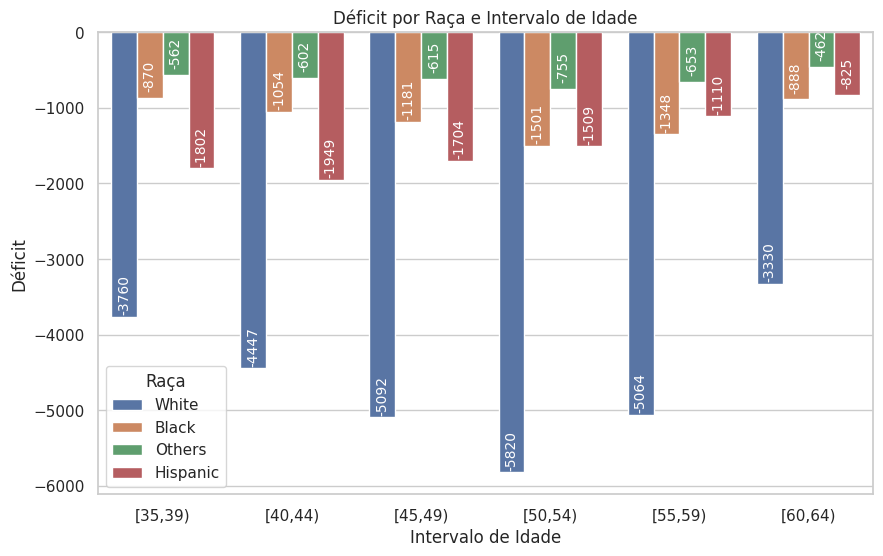

In [386]:
# Definir o estilo do gráfico
sns.set(style="whitegrid")

# Criar a figura e definir o tamanho
plt.figure(figsize=(10, 6))

# Plotar o gráfico de barras
ax = sns.barplot(x="interval_age", y="deficit", hue="race", data=df_concatenado)

# Adicionar título e rótulos aos eixos
plt.title('Déficit por Raça e Intervalo de Idade')
plt.xlabel('Intervalo de Idade')
plt.ylabel('Déficit')

# Adicionar os rótulos dentro das barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 16), textcoords='offset points', rotation=90, color='white',fontsize=10)

# Adicionar rótulos às legendas
plt.legend(title='Raça')

# Exibir o gráfico
plt.show()



## Impacto em pontos percentuais do novo cenário com classificação de prontidão para a aposentadoria, por corte de idade.

In [387]:
#Filtrando apenas as pessoas que deram entrada na aposentadoria
df_retirement = df[df['licensed'] == 'licensed']

#Agrupando faixas etarias
df_retirement = df_retirement.groupby('interval_age')['initial_age'].count().reset_index()

#criando coluna com total de pessoas
df_retirement['total_people'] = len(df)

# Renomeando a coluna
df_retirement = df_retirement.rename(columns={'initial_age': 'count'})

#calculando o rating e exibindo o resultado em porcentagem
for i in range(len (df_retirement)):

    rating = (df_retirement.loc[i, 'count'] / df_retirement.loc[i, 'total_people']) * 100
    df_retirement.loc[i, 'rating'] = '{:.2f}'.format(rating)

#Alterando formato da variavel
df_retirement['rating'] = df_retirement['rating'].astype('float')

In [388]:
df_retirement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   interval_age  6 non-null      category
 1   count         6 non-null      int64   
 2   total_people  6 non-null      int64   
 3   rating        6 non-null      float64 
dtypes: category(1), float64(1), int64(2)
memory usage: 498.0 bytes


Text(0, 0.5, 'Rating')

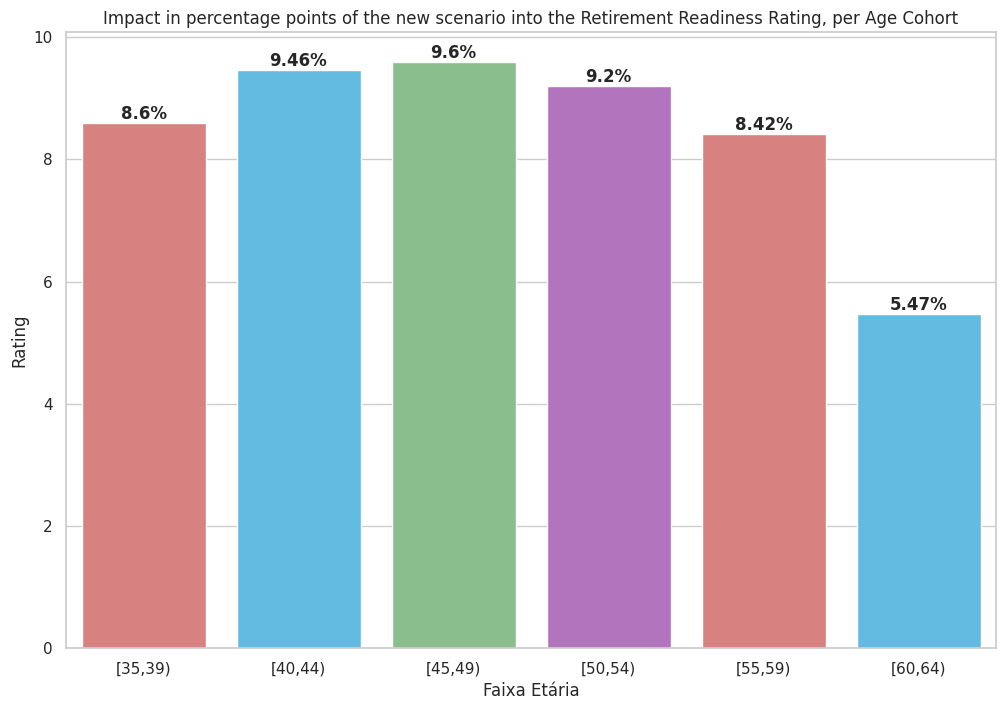

In [389]:
# Definindo uma paleta de cores personalizada
custom_palette = sns.color_palette(['#E57373', '#4FC3F7', '#81C784', '#BA68C8'])

# Criando o gráfico de barras usando Seaborn
sns.barplot(x='interval_age', y='rating', data=df_retirement, palette=custom_palette)

# Adicionando rótulos acima de cada barra com os valores em porcentagem
for i in range(len(df_retirement)):
    rating = df_retirement.loc[i, 'rating']
    plt.text(i, rating, f'{rating}%',
             ha='center', va='bottom', fontweight='bold')

# Personalizando o gráfico
plt.title('Impact in percentage points of the new scenario into the Retirement Readiness Rating, per Age Cohort')
plt.xlabel('Faixa Etária')
plt.ylabel('Rating')